In [1]:
from pathlib import Path
import os
import pandas as pd

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score,v_measure_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt


from nanoHUB.rfm.functions import CacheDirs, elbow_curve, display_cluster_info

nanoHUB - Serving Students, Researchers & Instructors


In [2]:
cached_dirs = CacheDirs()
data_dir = Path(cached_dirs.cache_dir, 'rfm/by_toolevents/iteration4')

In [3]:
df = pd.read_csv(
    Path(cached_dirs.cache_dir, 'unclassified_user_data.csv'),
    index_col=False
)

In [4]:
users = pd.DataFrame(df['user'].unique())
users.columns = ['user']

In [5]:
frequency_df = df[['user', 'job_event_days', 'toolevents__lifetime']].copy()
frequency_df['Frequency'] = frequency_df['job_event_days']/frequency_df['toolevents__lifetime']

users = pd.merge(users, frequency_df, on='user')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


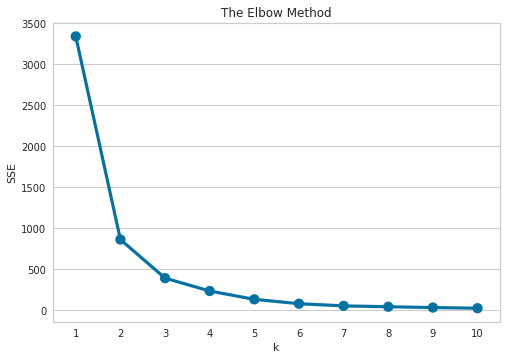

In [6]:
elbow_curve(users[['Frequency']])

In [7]:


kmeans = KMeans(n_clusters=4)
kmeans.fit(users[['Frequency']])
users['FrequencyCluster'] = kmeans.predict(users[['Frequency']])

In [8]:
display(users.groupby('FrequencyCluster')['Frequency'].describe())

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,23799.0,0.037228,0.039833,0.000357,0.006376,0.019324,0.058140,0.148148
1,2334.0,1.107689,0.220624,0.857143,1.000000,1.000000,1.000000,2.000000
2,3416.0,0.592214,0.110283,0.427083,0.500000,0.600000,0.666667,0.833333
3,6989.0,0.260304,0.078183,0.148325,0.190476,0.250000,0.333333,0.425532


In [9]:
users.to_csv(
    Path(data_dir, "frequency.csv"),
    index=False,
    index_label=False
)

In [10]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(users[['Frequency']])

Score for number of cluster(s) 2: -215.76795253247624
Silhouette score for number of cluster(s) 2: 0.7808945185569502
Davies Bouldin score for number of cluster(s) 2: 0.45136258574487875


'Centroids - '

[[0.04609041]
 [0.41490321]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -98.06686847236281
Silhouette score for number of cluster(s) 3: 0.7369057865308236
Davies Bouldin score for number of cluster(s) 3: 0.4624026942169041


'Centroids - '

[[0.22865837]
 [0.02966037]
 [0.54158685]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -58.77092754094463
Silhouette score for number of cluster(s) 4: 0.7056920558240393
Davies Bouldin score for number of cluster(s) 4: 0.4937987967440035


'Centroids - '

[[0.01926686]
 [0.30390533]
 [0.55512157]
 [0.13598338]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -33.5353180611793
Silhouette score for number of cluster(s) 5: 0.7155406253781478
Davies Bouldin score for number of cluster(s) 5: 0.38867372848565734


'Centroids - '

[[0.01929827]
 [0.49044648]
 [0.13581758]
 [0.74709082]
 [0.29607161]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 6: -20.047447972991844
Silhouette score for number of cluster(s) 6: 0.7036386985259945
Davies Bouldin score for number of cluster(s) 6: 0.36670647703769704


'Centroids - '

[[0.09202643]
 [0.33611668]
 [0.74709082]
 [0.49903006]
 [0.201749  ]
 [0.01346761]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 7: -13.478154931332805
Silhouette score for number of cluster(s) 7: 0.6915923322598132
Davies Bouldin score for number of cluster(s) 7: 0.38660706276834994


'Centroids - '

[[0.01031949]
 [0.49903006]
 [0.22301203]
 [0.13712932]
 [0.06572764]
 [0.74709082]
 [0.33853313]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 8: -10.77686258466829
Silhouette score for number of cluster(s) 8: 0.6686522821974601
Davies Bouldin score for number of cluster(s) 8: 0.4047721926283277


'Centroids - '

[[0.00729617]
 [0.49903006]
 [0.22472771]
 [0.74709082]
 [0.0873891 ]
 [0.33868358]
 [0.14650866]
 [0.04179707]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 9: -8.227453771289401
Silhouette score for number of cluster(s) 9: 0.6700325660644797
Davies Bouldin score for number of cluster(s) 9: 0.37199840903629466


'Centroids - '

[[0.22472771]
 [0.00726781]
 [0.49903006]
 [0.72751416]
 [0.14650866]
 [0.33868358]
 [0.0416046 ]
 [0.087234  ]
 [1.        ]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 10: -6.379941509315461
Silhouette score for number of cluster(s) 10: 0.6711304394280712
Davies Bouldin score for number of cluster(s) 10: 0.36749728672896687


'Centroids - '

[[0.49903006]
 [0.08336449]
 [0.00739453]
 [0.34260757]
 [0.18730746]
 [0.72751416]
 [0.13133137]
 [0.25157727]
 [0.04174944]
 [1.        ]]
----------------------------------------------------------------------------------------------------


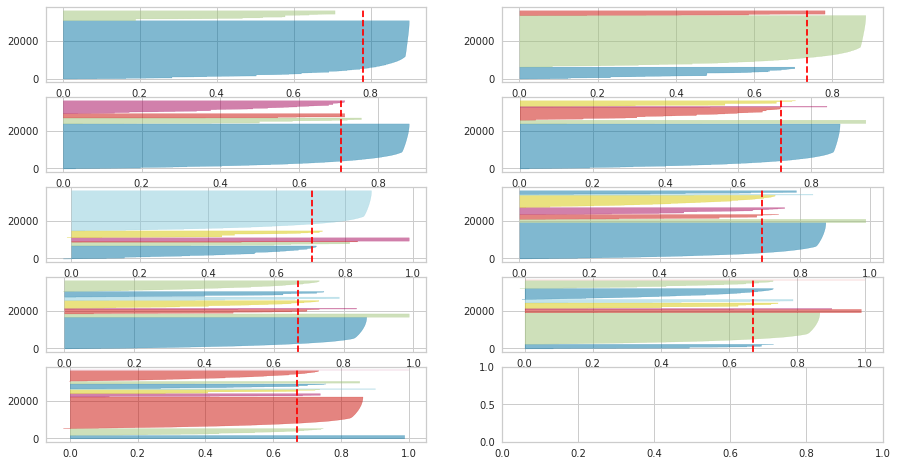

In [11]:
 display_cluster_info(X_scaled)